In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Random sample of 25: Glucose statistics and used charts for this comparison

In [3]:
np.random.seed(42)
sample_25 = df.sample(n=25, random_state=42)

sample_glucose_mean = sample_25['Glucose'].mean()
sample_glucose_max = sample_25['Glucose'].max()
population_glucose_mean = df['Glucose'].mean()
population_glucose_max = df['Glucose'].max()

Sample Mean Glucose: 116.64
Sample Max Glucose: 183
Population Mean Glucose: 120.89
Population Max Glucose: 199


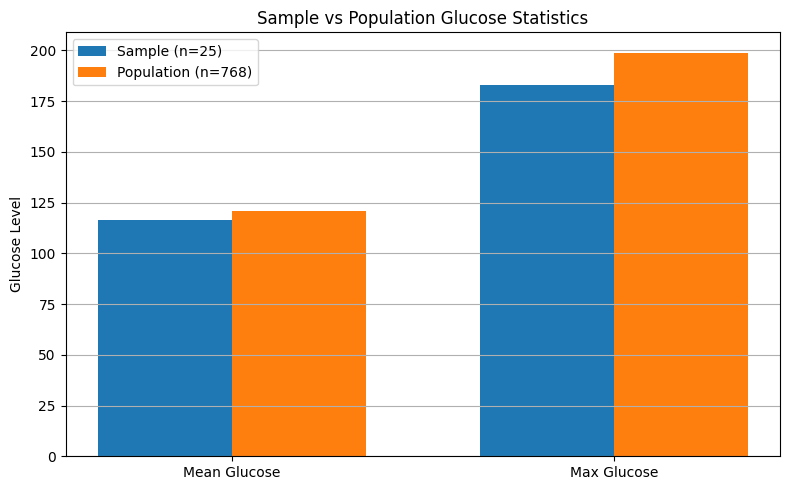

In [9]:
# Print values
print(f"Sample Mean Glucose: {sample_glucose_mean:.2f}")
print(f"Sample Max Glucose: {sample_glucose_max}")
print(f"Population Mean Glucose: {population_glucose_mean:.2f}")
print(f"Population Max Glucose: {population_glucose_max}")

# Visualization
labels = ['Mean Glucose', 'Max Glucose']
sample_vals = [sample_glucose_mean, sample_glucose_max]
pop_vals = [population_glucose_mean, population_glucose_max]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, sample_vals, width, label='Sample (n=25)')
plt.bar(x + width/2, pop_vals, width, label='Population (n=768)')
plt.xticks(x, labels)
plt.ylabel('Glucose Level')
plt.title('Sample vs Population Glucose Statistics')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The 98th percentile of BMI of my sample and the population and compared the results using charts.

Sample of 98th Percentile of BMI: 40.25
Population of 98th Percentile of BMI: 47.53




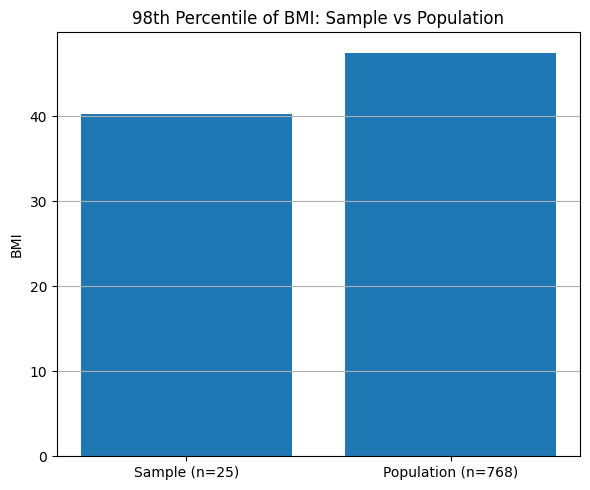

In [16]:
sample_bmi = np.percentile(sample_25['BMI'], 98)
population_bmi = np.percentile(df['BMI'], 98)

# Print values
print(f"Sample of 98th Percentile of BMI: {sample_bmi:.2f}")
print(f"Population of 98th Percentile of BMI: {population_bmi:.2f}")
print('\n')

# Visualization
plt.figure(figsize=(6, 5))
plt.bar(['Sample (n=25)', 'Population (n=768)'], [sample_bmi, population_bmi])
plt.ylabel('BMI')
plt.title('98th Percentile of BMI: Sample vs Population')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Bootstrap sampling of BloodPressure and found the average mean, standard deviation and percentile for BloodPressure and
compared the result with statistics.

In [17]:
# Bootstrap parameters
n_iterations = 500
sample_size = 150

bootstrap_means = []
bootstrap_stds = []
bootstrap_p98s = []

# Seting seed for reproducibility
np.random.seed(42)
# Bootstrap process
for _ in range(n_iterations):
    sample = df.sample(n=sample_size, replace=True)
    bp = sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_p98s.append(np.percentile(bp, 98))

# Compute average bootstrap statistics
bootstrap_mean_avg = np.mean(bootstrap_means)
bootstrap_std_avg = np.mean(bootstrap_stds)
bootstrap_p98_avg = np.mean(bootstrap_p98s)

Bootstrap Average Mean: 69.18
Bootstrap Average Standard Deviation: 19.07
Bootstrap Avg 98th Percentile: 97.90
Population Mean: 69.11
Population Standard Deviation: 19.36
Population 98th Percentile: 99.32


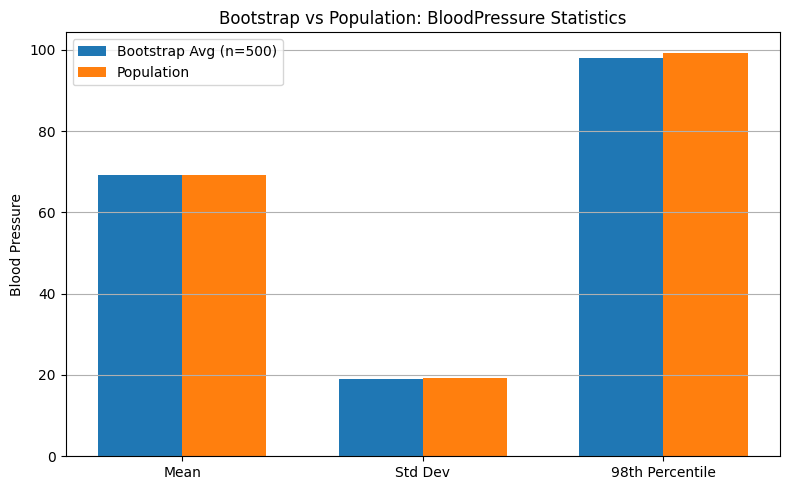

In [19]:
population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_p98_bp = np.percentile(df['BloodPressure'], 98)

# Print results
print(f"Bootstrap Average Mean: {bootstrap_mean_avg:.2f}")
print(f"Bootstrap Average Standard Deviation: {bootstrap_std_avg:.2f}")
print(f"Bootstrap Avg 98th Percentile: {bootstrap_p98_avg:.2f}")
print(f"Population Mean: {population_mean_bp:.2f}")
print(f"Population Standard Deviation: {population_std_bp:.2f}")
print(f"Population 98th Percentile: {population_p98_bp:.2f}")

# Visualization
stats = ['Mean', 'Std Dev', '98th Percentile']
bootstrap_vals = [bootstrap_mean_avg, bootstrap_std_avg, bootstrap_p98_avg]
pop_vals = [population_mean_bp, population_std_bp, population_p98_bp]

x = np.arange(len(stats))
plt.figure(figsize=(8, 5))
plt.bar(x - width/2, bootstrap_vals, width, label='Bootstrap Avg (n=500)')
plt.bar(x + width/2, pop_vals, width, label='Population')
plt.xticks(x, stats)
plt.ylabel('Blood Pressure')
plt.title('Bootstrap vs Population: BloodPressure Statistics')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()